In [2]:
using Plots

In [3]:
function plotline(points::Matrix{Int64}; color::Int64=1, ls=:solid)
    plot(points[:,1], points[:,2], points[:,3], color = color, ls=ls, lw=2,
    zlim=(-2.5,2.5), xlim=(-2.5,2.5), ylim=(-2.5,2.5))
    xlabel!("x")
    ylabel!("y")
end
function plotline!(points::Matrix{Int64}; color::Int64=1, ls=:solid)
    plot!(points[:,1], points[:,2], points[:,3], color = color, ls=ls, lw=2)
end

plotline! (generic function with 1 method)

In [4]:
function background()
points = [1 1 1; 1 -1 1; -1 -1 1; -1 1 1; 1 1 1]
plotline(points)
points = [1 1 -1; 1 -1 -1; -1 -1 -1]
plotline!(points)
points = [ -1 1 -1; 1 1 -1]
plotline!(points, ls=:dash)
points = [ -1 1 -1; -1 -1 -1]
plotline!(points, ls=:dash)
points = [1 1 -1; 1 1 1]
plotline!(points)
points = [1 -1 -1; 1 -1 1]
plotline!(points)
points = [-1 1 -1; -1 1 1]
plotline!(points, ls=:dash)
points = [-1 -1 -1; -1 -1 1]
plotline!(points)

points1 = [1 1 1; 1 1 -1; 1 -1 1; 1 -1 -1; -1 1 1; -1 1 -1; -1 -1 1; -1 -1 -1]
points2 = [2 0 0; 0 2 0; 0 0 2; -2 0 0; 0 -2 0; 0 0 -2]
points = vcat(points1, points2)
scatter!(points[:,1], points[:,2], points[:,3], mc=:white)
end

background (generic function with 1 method)

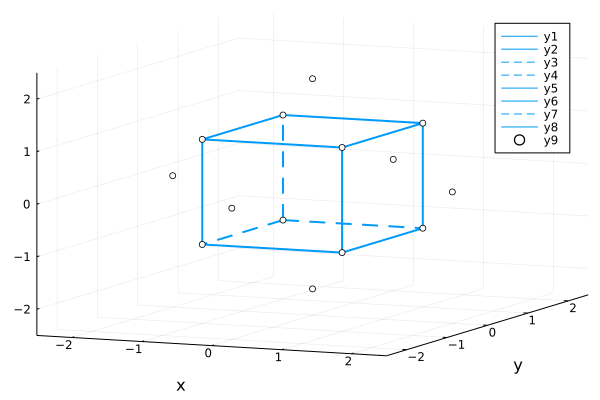

In [5]:
background()

In [6]:
using Rotations

In [7]:
body_diagonals = Array{Float64}(undef,0,3)
for x in [-1.0,1.0]
    for y in [-1.0,1.0]
        z = 1.0
        body_diagonals = vcat(body_diagonals, [x y z])
    end
end
angles = Float64[2pi/3, 4pi/3]
Rs = AngleAxis[]

for i in 1:size(body_diagonals,1)
    for j in 1:length(angles)
        R = AngleAxis(angles[j], body_diagonals[i,1], body_diagonals[i,2], body_diagonals[i,3])
        push!(Rs,R)
    end
end

In [8]:
axises = [1 0 0; 0 1 0; 0 0 1]
angles = [pi/2, pi, 3pi/2]
for i in 1:size(axises,1)
    for j in 1:length(angles)
        R = AngleAxis(angles[j], axises[i,1], axises[i,2], axises[i,3])
        push!(Rs,R)
    end
end

In [9]:
face_diagonals = [1 1 0; 1 -1 0; 1 0 1; 1 0 -1; 0 1 1; 0 1 -1]
for i in 1:size(face_diagonals,1)
    R = AngleAxis(pi, face_diagonals[i,1], face_diagonals[i,2], face_diagonals[i,3])
    push!(Rs,R)
end

In [10]:
function apply(points::Matrix{Float64}, Rs::Array{AngleAxis})
    newPoints = Matrix{Float64}(undef,0,3)
    for i in 1:size(points,1)
        for j in 1:length(Rs)
            newPoints[i,:] = Rs[j] * points[i,:]
        end
    end
    return newPoints
end

apply (generic function with 1 method)

In [11]:
const origin_points = Float64[1 1 1; 1 1 -1; 1 -1 1; 1 -1 -1; -1 1 1; -1 1 -1; -1 -1 1; -1 -1 -1;
2 0 0; 0 2 0; 0 0 2; -2 0 0; 0 -2 0; 0 0 -2]
function all_combinations()
    points_set = Vector{Matrix{Float64}}([])
    points = Matrix{Float64}(undef,0,3)
    generate_points(points_set, points,1)
    points_set
end

all_combinations (generic function with 1 method)

In [12]:
function generate_points(points_set::Vector{Matrix{Float64}}, points::Matrix{Float64}, n::Int64)
    if n > 14
        push!(points_set, points)
        return
    else
        generate_points(points_set, points, n+1)
        point = Matrix{Float64}(undef,1,3)
        point[1,:] = origin_points[n,:]
        generate_points(points_set, vcat(points, point), n+1)
    end
end

generate_points (generic function with 1 method)

In [13]:
points_set = all_combinations()

16384-element Vector{Matrix{Float64}}:
 0×3 Matrix{Float64}
 [0.0 0.0 -2.0]
 [0.0 -2.0 0.0]
 [0.0 -2.0 0.0; 0.0 0.0 -2.0]
 [-2.0 0.0 0.0]
 [-2.0 0.0 0.0; 0.0 0.0 -2.0]
 [-2.0 0.0 0.0; 0.0 -2.0 0.0]
 [-2.0 0.0 0.0; 0.0 -2.0 0.0; 0.0 0.0 -2.0]
 [0.0 0.0 2.0]
 [0.0 0.0 2.0; 0.0 0.0 -2.0]
 ⋮
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 -2.0 0.0; 0.0 0.0 -2.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 2.0 0.0; 0.0 0.0 2.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 0.0 2.0; 0.0 0.0 -2.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 0.0 2.0; 0.0 -2.0 0.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 -2.0 0.0; 0.0 0.0 -2.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 0.0 2.0; -2.0 0.0 0.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; -2.0 0.0 0.0; 0.0 0.0 -2.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; -2.0 0.0 0.0; 0.0 -2.0 0.0]
 [1.0 1.0 1.0; 1.0 1.0 -1.0; … ; 0.0 -2.0 0.0; 0.0 0.0 -2.0]

In [14]:
for i in length(points_set)
    points_set[i] = ceil.(Int, p)
end

In [17]:
points_set[2]

1×3 Matrix{Float64}:
 0.0  0.0  -2.0